In [654]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels

In [655]:
df=pd.read_csv("weather_prediction_dataset.csv")
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [656]:
df1=pd.read_csv("weather_prediction_bbq_labels.csv")
df1.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [657]:
#predictions for BASEL city
new_df=df.columns[:11]

In [658]:
new_df=list(new_df)

In [659]:
new_df=df[new_df]

In [660]:
new_df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6


In [661]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    3654 non-null   int64  
 1   MONTH                   3654 non-null   int64  
 2   BASEL_cloud_cover       3654 non-null   int64  
 3   BASEL_humidity          3654 non-null   float64
 4   BASEL_pressure          3654 non-null   float64
 5   BASEL_global_radiation  3654 non-null   float64
 6   BASEL_precipitation     3654 non-null   float64
 7   BASEL_sunshine          3654 non-null   float64
 8   BASEL_temp_mean         3654 non-null   float64
 9   BASEL_temp_min          3654 non-null   float64
 10  BASEL_temp_max          3654 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 314.1 KB


In [662]:
new_df['DATE']=pd.to_datetime(new_df['DATE'],format='%Y%m%d')

C:\Users\aliza\AppData\Local\Temp\ipykernel_1180\978733951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DATE']=pd.to_datetime(new_df['DATE'],format='%Y%m%d')


In [663]:
new_df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,2000-01-01,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,2000-01-02,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,2000-01-03,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,2000-01-04,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,2000-01-05,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6


In [664]:
ll=new_df['DATE']

In [665]:
new_df.set_index('DATE',drop=True,inplace=True)

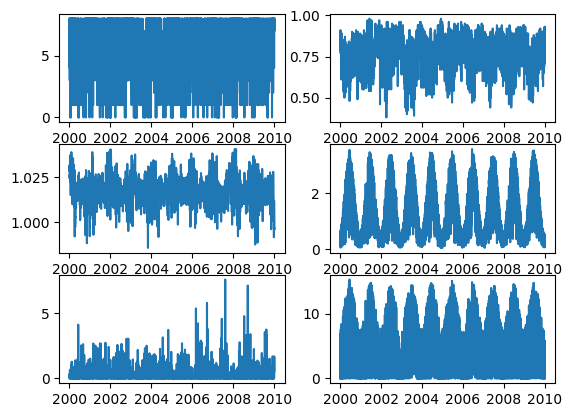

In [666]:

# new_df[list(new_df.columns)[1]].plot()
fig,((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
ax1.plot(ll,new_df[list(new_df.columns)[1]])
ax2.plot(ll,new_df[list(new_df.columns)[2]])
ax3.plot(ll,new_df[list(new_df.columns)[3]])
ax4.plot(ll,new_df[list(new_df.columns)[4]])
ax5.plot(ll,new_df[list(new_df.columns)[5]])
ax6.plot(ll,new_df[list(new_df.columns)[6]])


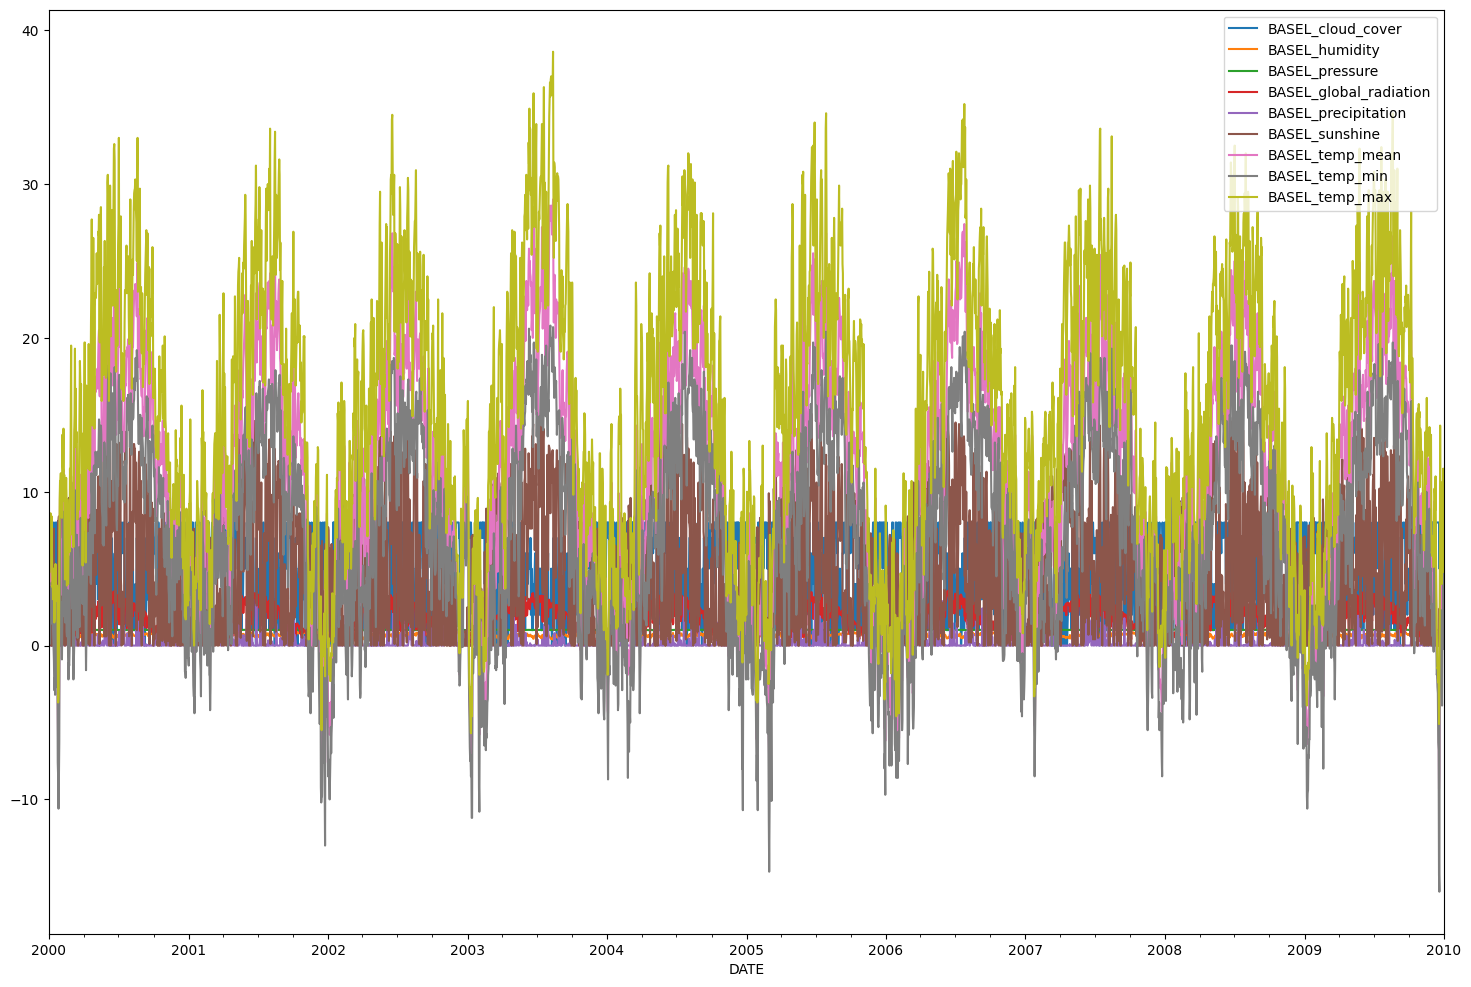

In [667]:
new_df[list(new_df.columns)[1:]].plot(figsize=(18,12))
plt.legend(loc='upper right')

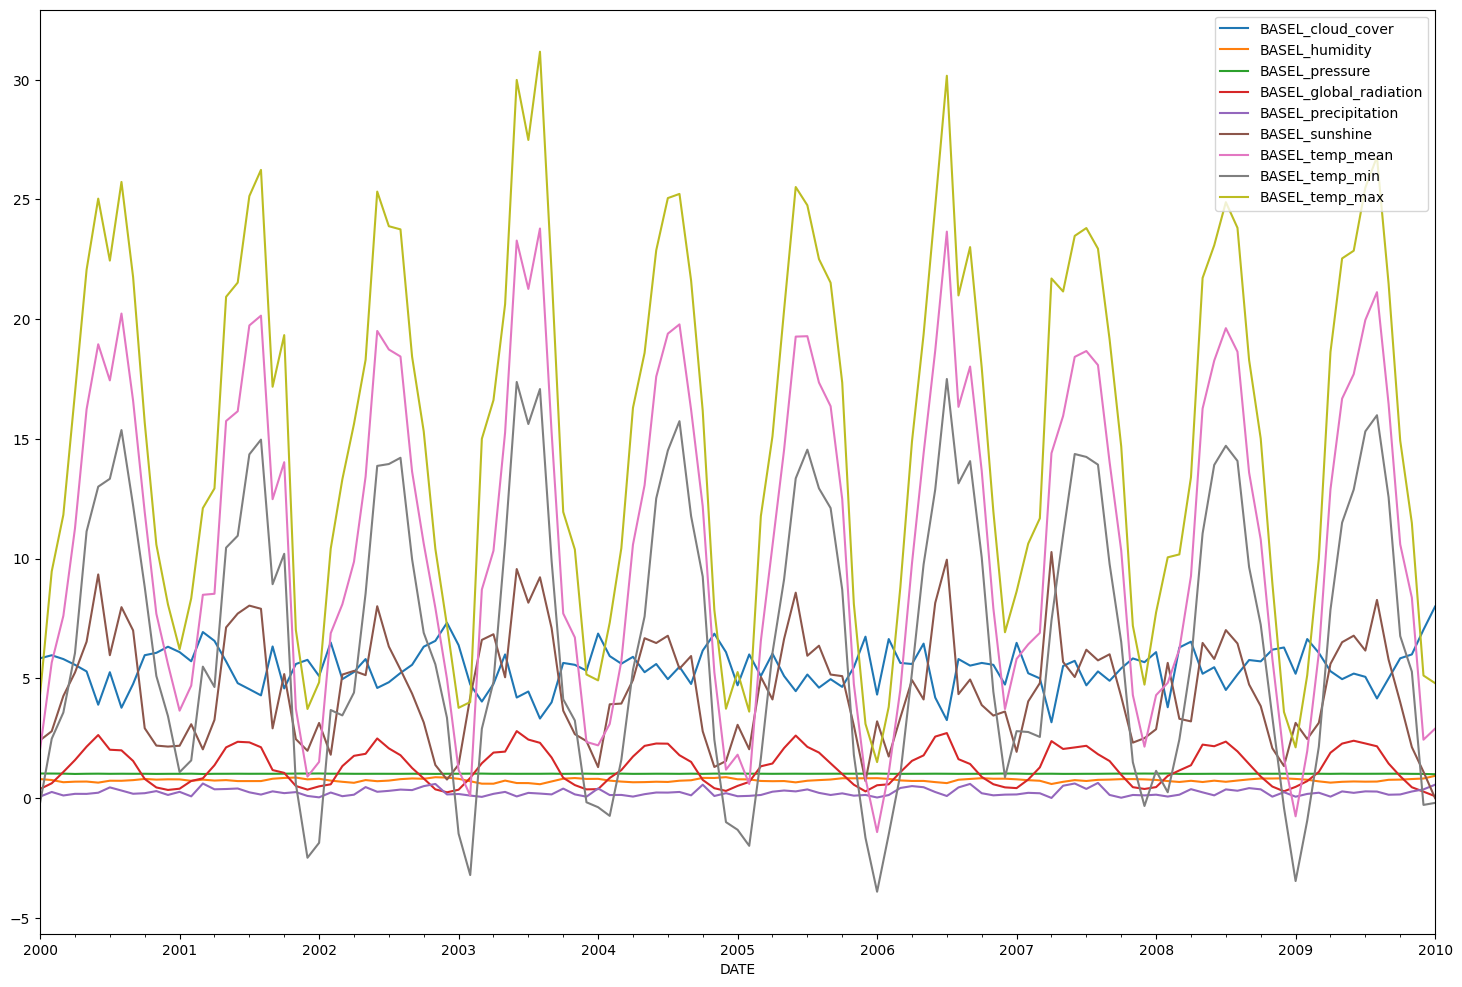

In [668]:
new_df[list(new_df.columns)[1:]].resample('MS').mean().plot(figsize=(18,12))
plt.legend(loc='upper right')

In [669]:
from statsmodels.tsa.stattools import adfuller

In [670]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [671]:
lsi=list(new_df.columns)
lsi

['MONTH',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [672]:
for i in lsi[8:]:
    print(i)
    print()
    print(adf_test(new_df[i]))
    print("\n\n")

BASEL_temp_min

ADF Statistics: -4.735517585658463
p- value: 7.213208345674608e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None



BASEL_temp_max

ADF Statistics: -4.426895234760844
p- value: 0.000265936661296624
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None





In [673]:
for i in lsi[:4]:
    print(i)
    print()
    print(adf_test(new_df[i]))
    print("\n\n")

MONTH

ADF Statistics: -5.285867841161403
p- value: 5.857063998235325e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None



BASEL_cloud_cover

ADF Statistics: -19.212189025084854
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None



BASEL_humidity

ADF Statistics: -5.595045195454235
p- value: 1.3028087441040444e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None



BASEL_pressure

ADF Statistics: -17.40169958752634
p- value: 4.942766152342603e-30
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None





In [676]:
new_df.drop(['MONTH'],axis=1,inplace=True)

C:\Users\aliza\AppData\Local\Temp\ipykernel_1180\3723242149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['MONTH'],axis=1,inplace=True)


In [677]:
new_df.columns

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object')

In [715]:
def create_dataset(dataset):
    x=[]
    y=[]
    time_step=355
    # i=0
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:i+time_step]
        x.append(a)
        b=dataset[i+time_step:i+time_step+1,1]
        y.append(b)
    x=np.array(x)
    y=np.array(y)
    return x,y

In [716]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
f_df=scaler.fit_transform(new_df)
# y=scaler.transform(y)

In [717]:
f_df.shape

(3654, 9)

In [718]:
x,y=create_dataset(f_df)

In [719]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123)

In [720]:
x_train.shape

(2473, 355, 9)

In [721]:
from keras.layers import LSTM,Dense
from keras.models import Sequential
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(355,9)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(40,return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))

In [722]:
model.compile(optimizer='adam',loss='mse')

In [723]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 355, 60)           16800     
                                                                 
 lstm_46 (LSTM)              (None, 355, 50)           22200     
                                                                 
 lstm_47 (LSTM)              (None, 355, 40)           14560     
                                                                 
 lstm_48 (LSTM)              (None, 40)                12960     
                                                                 
 dense_12 (Dense)            (None, 1)                 41        
                                                                 
Total params: 66561 (260.00 KB)
Trainable params: 66561 (260.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [724]:
model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
25/25 [==============================] - 21s 603ms/step - loss: 0.8244
Epoch 2/10
25/25 [==============================] - 15s 619ms/step - loss: 0.7586
Epoch 3/10
25/25 [==============================] - 15s 618ms/step - loss: 0.7473
Epoch 4/10
25/25 [==============================] - 16s 643ms/step - loss: 0.7232
Epoch 5/10
25/25 [==============================] - 16s 623ms/step - loss: 0.7112
Epoch 6/10
25/25 [==============================] - 15s 585ms/step - loss: 0.6910
Epoch 7/10
25/25 [==============================] - 16s 626ms/step - loss: 0.6784
Epoch 8/10
25/25 [==============================] - 16s 628ms/step - loss: 0.6674
Epoch 9/10
25/25 [==============================] - 17s 664ms/step - loss: 0.6345
Epoch 10/10
25/25 [==============================] - 16s 641ms/step - loss: 0.6053


In [688]:
x_train.shape

(2473, 355, 9)

In [689]:
y_train.shape

(2473, 1)

In [725]:
y_pred=model.predict(x_train)

78/78 [==============================] - 9s 99ms/step


In [726]:
y_pred.shape

(2473, 1)

In [692]:
y_pred.shape

(2473, 1)

In [741]:
c=new_df.columns.to_list()[1]

In [742]:
y_pred=y_pred.reshape((1,-1))[0]

In [744]:
di={c:y_pred}

In [745]:
predicted_df=pd.DataFrame(di)

In [728]:
new_df.head(2)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
DATE,,,,,,,,,
2000-01-01,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
2000-01-02,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8


In [746]:
predicted_df

,BASEL_humidity
0,0.774544
1,-0.529240
2,-0.213215
3,0.626420
4,-0.177485
...,...
2468,0.837343
2469,-0.668911
2470,0.910753
2471,0.447943


In [731]:
l1=ll[:2473]

In [732]:
l3=pd.DataFrame(f_df,columns=new_df.columns.to_list())

In [733]:
l3['DATE']=ll
l3.set_index('DATE',drop=True,inplace=True,)

In [734]:
l3.tail(2)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
DATE,,,,,,,,,
2009-12-31,0.680186,1.715584,-2.772956,-1.240756,0.625054,-1.053510,-0.596568,-0.404233,-0.875765
2010-01-01,1.110260,1.715584,-2.685030,-1.336990,0.606404,-1.076608,-1.095641,-1.080676,-1.231264


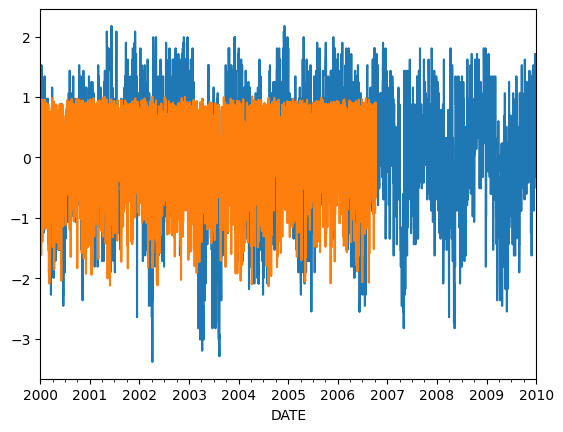

In [749]:
l3['BASEL_humidity'].plot()
plt.plot(l1,predicted_df['BASEL_humidity'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [752]:
new_df.head(2)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
DATE,,,,,,,,,
2000-01-01,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
2000-01-02,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8


<Axes: xlabel='DATE'>

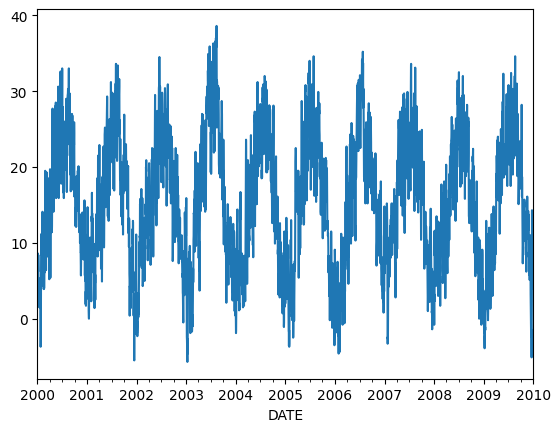

In [754]:
new_df['BASEL_temp_max'].plot()

In [756]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

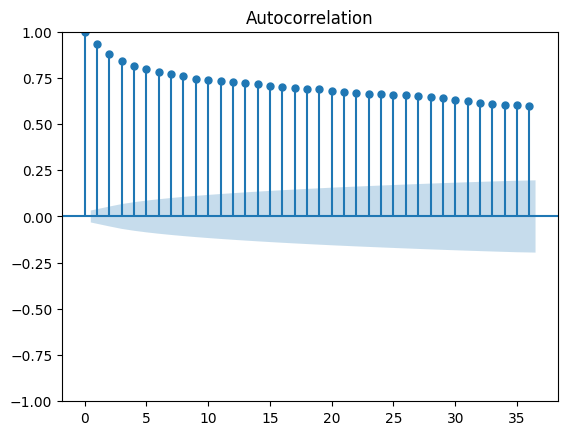

In [757]:
#q=25
acf=plot_acf(new_df['BASEL_temp_max'])

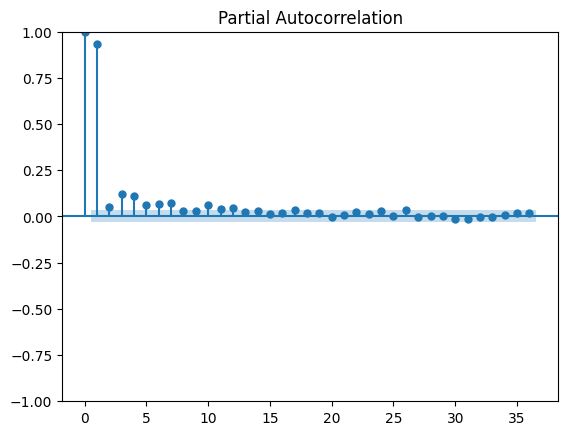

In [758]:
#p=12
pacf=plot_pacf(new_df['BASEL_temp_max'])

In [759]:
len(new_df['BASEL_temp_max'])

3654

In [761]:
train=new_df['BASEL_temp_max'][:2500]
test=new_df['BASEL_temp_max'][2500:]

In [768]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(12,0,25))

c:\Users\aliza\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [779]:
st=new_df.index[2500]
en=new_df.index[-1]

In [775]:
model_fit=model.fit()

c:\Users\aliza\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [793]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         BASEL_temp_max   No. Observations:                 2500
Model:               ARIMA(12, 0, 25)   Log Likelihood               -6312.589
Date:                Mon, 29 Jan 2024   AIC                          12703.177
Time:                        02:29:37   BIC                          12930.315
Sample:                    01-01-2000   HQIC                         12785.639
                         - 11-04-2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6629      0.503     31.152      0.000      14.677      16.648
ar.L1         -0.0339      1.593     -0.021      0.983      -3.155       3.088
ar.L2          0.0650      0.960      0.068      0.946      -1.817       1.947
ar.L3         -0.0164      0.850     -0.019      0.985      -1.681       1.649
ar.L4          0.6064      0.857      0.708      0.479      -1.073       2.286
ar.L5          0.4446      1.367      0.325      0.745      -2.236       3.125
ar.L6          0.6156      1.043      0.590      0.555      -1.429       2.660
ar.L7          0.2465      1.200      0.205      0.837      -2.105       2.598
ar.L8         -0.0380      0.892     -0.043      0.966      -1.786       1.710
ar.L9         -0.3677      0.813     -0.452      0.651      -1.961       1.225
ar.L10         0.1475      0.964      0.153      0.878      -1.742       2.037
ar.L11        -0.1913      0.761     -0.251      0.802      -1.684       1.301
ar.L12        -0.4868      0.762     -0.639      0.523      -1.979       1.006
ma.L1          0.8234      1.593      0.517      0.605      -2.298       3.945
ma.L2          0.5337      1.322      0.404      0.686      -2.057       3.125
ma.L3          0.3881      1.397      0.278      0.781      -2.349       3.126
ma.L4         -0.2702      1.054     -0.256      0.798      -2.337       1.796
ma.L5         -0.6137      1.400     -0.438      0.661      -3.358       2.130
ma.L6         -1.0735      1.612     -0.666      0.505      -4.233       2.086
ma.L7         -1.0130      2.114     -0.479      0.632      -5.156       3.130
ma.L8         -0.6814      1.788     -0.381      0.703      -4.185       2.822
ma.L9         -0.1911      1.282     -0.149      0.882      -2.704       2.322
ma.L10        -0.3282      1.098     -0.299      0.765      -2.480       1.824
ma.L11        -0.1395      0.671     -0.208      0.835      -1.455       1.176
ma.L12         0.3480      0.519      0.670      0.503      -0.670       1.366
ma.L13         0.2812      0.320      0.880      0.379      -0.345       0.908
ma.L14         0.1922      0.206      0.934      0.350      -0.211       0.595
ma.L15         0.1454      0.189      0.769      0.442      -0.225       0.516
ma.L16         0.1651      0.223      0.741      0.459      -0.271       0.602
ma.L17         0.1544      0.245      0.631      0.528      -0.325       0.634
ma.L18         0.0799      0.210      0.381      0.703      -0.331       0.491
ma.L19         0.0726      0.162      0.447      0.655      -0.246       0.391
ma.L20         0.0731      0.120      0.611      0.541      -0.161       0.308
ma.L21         0.0409      0.060      0.685      0.494      -0.076       0.158
ma.L22         0.0259      0.036      0.718      0.473      -0.045       0.097
ma.L23         0.0122      0.042      0.288      0.774      -0.071       0.095
ma.L24         0.0285      0.030      0.949      0.343      -0.030       0.087
ma.L25         0.0118      0.045      0.261      0.794      -0.077       0.100
si

In [780]:
new_df['Predict_temp_max']=model_fit.predict(st,en)

C:\Users\aliza\AppData\Local\Temp\ipykernel_1180\3897296241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Predict_temp_max']=model_fit.predict(st,en)


<Axes: xlabel='DATE'>

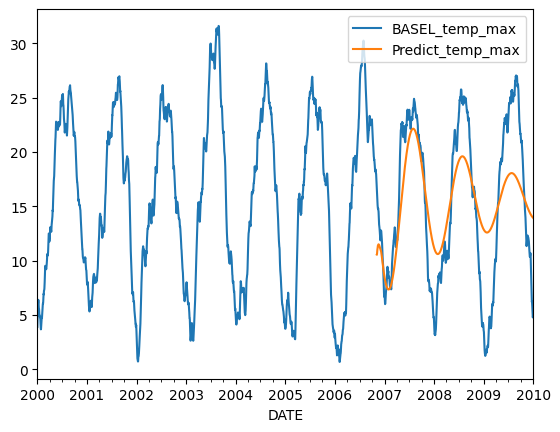

In [792]:
new_df[['BASEL_temp_max','Predict_temp_max']].rolling(30,min_periods=1).mean().plot()
# new_df[['Predict_temp_max']].plot()

<Axes: xlabel='DATE'>

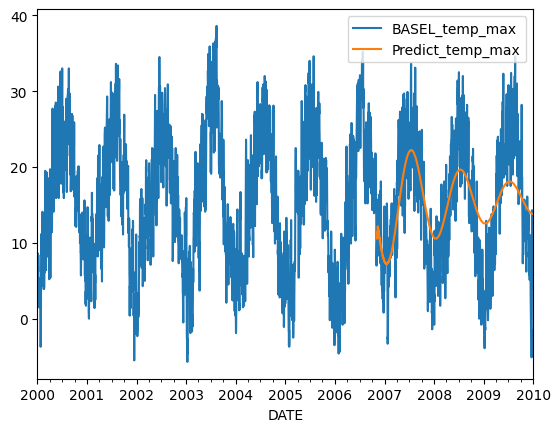

In [781]:
new_df[['BASEL_temp_max','Predict_temp_max']].plot()